### Write a Python program to count the number of digits in any given integer number

In [1]:
numbers = int(input("Enter a number: "))
count = 0
for digit in str(abs(numbers)):  
    count += 1
print("Total number of digits:", count)

Enter a number:  452667


Total number of digits: 6


### A Palindrome is a string that reads the same backwards and forwards. Write a Python program to determine whether or not a given string is a Palindrome. 

In [3]:
user_input = str(input("Enter a sentence: "))
def is_palindrome(s):
    formatted_str = s.replace(" ", "").lower()
    return formatted_str == formatted_str[::-1]
print("Is palindrome:", is_palindrome(user_input))

Enter a sentence:  Mom


Is palindrome: True


### Read the dataset into a Pandas dataframe called 'loans' and clean it as necessary.

In [5]:
import pandas as pd
df = pd.read_excel("/Users/thabisomakhathini/Downloads/Loans Data.xlsx")
df

,Age,Marital Status,Income,Gender,Loan Category
0,44,1,48400,0.0,1.0
1,33,1,b,0.0,NaN
2,52,1,57200,1.0,3.0
3,jj,0,36300,1.0,1.0
4,30,1,33000,0.0,3.0
...,...,...,...,...,...
995,39,0,42900,1.0,1.0
996,34,0,37400,1.0,1.0
997,59,0,64900,1.0,4.0
998,49,0,53900,1.0,3.0


In [7]:
#Force column to numeric data type to deal with inconcistant data 
df['Age'] =pd.to_numeric(df['Age'],errors = 'coerce')

In [9]:
df['Income'] =pd.to_numeric(df['Income'],errors = 'coerce')

 #### Analyse the data and display the average age of the clients in the dataset? [5]

In [12]:
Ave_Age = df['Age'].mean()
Ave_Age = round(Ave_Age)
Ave_Age 

42

In [14]:
df['Age'].fillna(Ave_Age, inplace = True)
df

,Age,Marital Status,Income,Gender,Loan Category
0,44.0,1,48400.0,0.0,1.0
1,33.0,1,NaN,0.0,NaN
2,52.0,1,57200.0,1.0,3.0
3,42.0,0,36300.0,1.0,1.0
4,30.0,1,33000.0,0.0,3.0
...,...,...,...,...,...
995,39.0,0,42900.0,1.0,1.0
996,34.0,0,37400.0,1.0,1.0
997,59.0,0,64900.0,1.0,4.0
998,49.0,0,53900.0,1.0,3.0


In [16]:
df.isnull().any() #check null values

Age               False
Marital Status    False
Income             True
Gender             True
Loan Category      True
dtype: bool

In [18]:
df = df.dropna(axis =0) # Drop null values 

In [20]:
df.isnull().any() #check null values

Age               False
Marital Status    False
Income            False
Gender            False
Loan Category     False
dtype: bool

In [22]:
df.shape

(992, 5)

### Display the gender that is more dominant than the other in the dataset? [5]

In [25]:
df.loc[df['Gender'] == 0.0].count()

Age               479
Marital Status    479
Income            479
Gender            479
Loan Category     479
dtype: int64

In [27]:
df.loc[df['Gender'] == 1.0].count() # This is the dominant gender 

Age               513
Marital Status    513
Income            513
Gender            513
Loan Category     513
dtype: int64

### Display the number of clients who are married? [5]

In [30]:
df.loc[df['Marital Status'] == 1.0] # This is the married 

,Age,Marital Status,Income,Gender,Loan Category
0,44.0,1,48400.0,0.0,1.0
2,52.0,1,57200.0,1.0,3.0
4,30.0,1,33000.0,0.0,3.0
6,22.0,1,24200.0,1.0,2.0
8,42.0,1,42000.0,0.0,3.0
...,...,...,...,...,...
991,50.0,1,55000.0,1.0,2.0
992,52.0,1,57200.0,0.0,3.0
993,54.0,1,59400.0,1.0,4.0
994,46.0,1,50600.0,0.0,4.0


In [32]:
Highest_income = df[['Age','Gender','Income']]
Highest_income.describe(include ='all')

,Age,Gender,Income
count,992.000000,992.000000,992.000000
mean,41.707661,0.517137,45866.028226
std,12.571460,0.499958,13832.648504
min,18.000000,0.000000,19800.000000
25%,32.000000,0.000000,35200.000000
50%,40.000000,1.000000,44000.000000
75%,51.000000,1.000000,56100.000000
max,77.000000,1.000000,84700.000000


### Display the age and gender of the client with the highest income? [5]

In [35]:
Highest_income = Highest_income.loc[df['Income'] == 84700.000]
Highest_income

,Age,Gender,Income
784,77.0,1.0,84700.0


### Train Develop and Train Model to predict loan category per income 

In [38]:

df = df[['Income','Loan Category']]
df

,Income,Loan Category
0,48400.0,1.0
2,57200.0,3.0
3,36300.0,1.0
4,33000.0,3.0
5,42900.0,3.0
...,...,...
995,42900.0,1.0
996,37400.0,1.0
997,64900.0,4.0
998,53900.0,3.0


In [40]:
from sklearn.model_selection import train_test_split # Split train and test data 
x = df.iloc[:,:1]
y = df.iloc[:,1:]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)
print ('Train set:', x_train.shape, y_train.shape)
print ('Test set:', x_test.shape, y_test.shape)

Train set: (744, 1) (744, 1)
Test set: (248, 1) (248, 1)


### Use Linear Regression to predict the loan category of a client based on their income. Use 75% as training data and 25% as testing data. Show all steps clearly and include comments. [15]

In [43]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor

LinearRegression()

In [47]:
regressor.fit(x_train,y_train)

LinearRegression()

In [141]:
predict_y_test = regressor.predict(x_test)
predict_y_train = regressor.predict(x_train)

In [51]:
predict_y_test.shape

(248, 1)

In [53]:
predict_y_train.shape

(744, 1)

### Plot the regression graph for the traininng data vs the predicted values to indicate clients' loan category relative to income. Label all axes and give an appropriate title to your graph. [10]

Text(0, 0.5, 'Loan Category')

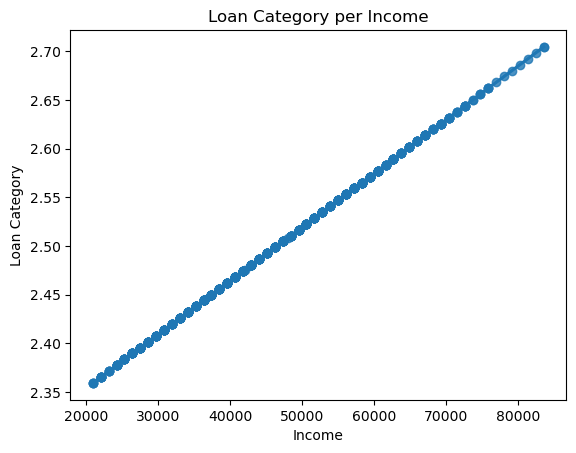

In [137]:
# the regression graph for the traininng data vs the predicted values based on income 
import seaborn as sns 
sns.regplot(x= x_train, y=predict_y_train, data=df)
plt.title('Loan Category per Income')
plt.xlabel('Income')
plt.ylabel('Loan Category')

### Calculate and display the coefficient of determination (r-squared value) to evaluate the efficieency of the model. [5]

In [91]:
from sklearn.metrics import r2_score
coefficient_of_dermination = r2_score(y_train,predict_y_train)
coefficient_of_dermination

0.0045359209094358865

In [93]:
coefficient_of_dermination = r2_score(y_test,predict_y_test)
coefficient_of_dermination

-0.001529998026956969

### Use Linear Regression to predict the loan category of a client given their age, gender, marital status and income. Training data = 75% and testing data = 25%. Show all steps and comment each step. [15]

In [145]:
import pandas as pd
df = pd.read_excel("/Users/thabisomakhathini/Downloads/Loans Data.xlsx")
df

,Age,Marital Status,Income,Gender,Loan Category
0,44,1,48400,0.0,1.0
1,33,1,b,0.0,NaN
2,52,1,57200,1.0,3.0
3,jj,0,36300,1.0,1.0
4,30,1,33000,0.0,3.0
...,...,...,...,...,...
995,39,0,42900,1.0,1.0
996,34,0,37400,1.0,1.0
997,59,0,64900,1.0,4.0
998,49,0,53900,1.0,3.0


In [147]:
#Force column to numeric data type to deal with inconcistant data 
df['Age'] =pd.to_numeric(df['Age'],errors = 'coerce')

In [149]:
df['Income'] =pd.to_numeric(df['Income'],errors = 'coerce')

In [151]:
Ave_Age = df['Age'].mean()
Ave_Age = round(Ave_Age)
Ave_Age 

42

In [153]:
df['Age'].fillna(Ave_Age, inplace = True)
df

,Age,Marital Status,Income,Gender,Loan Category
0,44.0,1,48400.0,0.0,1.0
1,33.0,1,NaN,0.0,NaN
2,52.0,1,57200.0,1.0,3.0
3,42.0,0,36300.0,1.0,1.0
4,30.0,1,33000.0,0.0,3.0
...,...,...,...,...,...
995,39.0,0,42900.0,1.0,1.0
996,34.0,0,37400.0,1.0,1.0
997,59.0,0,64900.0,1.0,4.0
998,49.0,0,53900.0,1.0,3.0


In [157]:
df = df.dropna(axis =0) # Drop null values 
df

,Age,Marital Status,Income,Gender,Loan Category
0,44.0,1,48400.0,0.0,1.0
2,52.0,1,57200.0,1.0,3.0
3,42.0,0,36300.0,1.0,1.0
4,30.0,1,33000.0,0.0,3.0
5,39.0,0,42900.0,1.0,3.0
...,...,...,...,...,...
995,39.0,0,42900.0,1.0,1.0
996,34.0,0,37400.0,1.0,1.0
997,59.0,0,64900.0,1.0,4.0
998,49.0,0,53900.0,1.0,3.0


In [173]:
x = df.drop(df[['Loan Category']], axis = 1)
y = df[['Loan Category']]

In [175]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)
print ('Train set:', x_train.shape, y_train.shape)
print ('Test set:', x_test.shape, y_test.shape)

Train set: (744, 4) (744, 1)
Test set: (248, 4) (248, 1)


In [177]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor

LinearRegression()

In [179]:
regressor.fit(x_train,y_train)

LinearRegression()

### Use the testing and training data to evaluate the efficacy of the model in predicting loan categories 

In [181]:
predict_y_test = regressor.predict(x_test)
predict_y_train = regressor.predict(x_train)

In [204]:
predict_y_train.shape

(744, 1)

In [206]:
predict_y_test.shape

(248, 1)

In [183]:
from sklearn.metrics import r2_score
coefficient_of_dermination = r2_score(y_train,predict_y_train)
coefficient_of_dermination

0.013108165147772133

In [185]:
coefficient_of_dermination = r2_score(y_test,predict_y_test)
coefficient_of_dermination

-0.010844710336749053

### Plot two 'distribution plots', one for the training data vs predicted values and the other for the testing data vs predicted values. [10]

Text(0, 0.5, 'FACTORS')

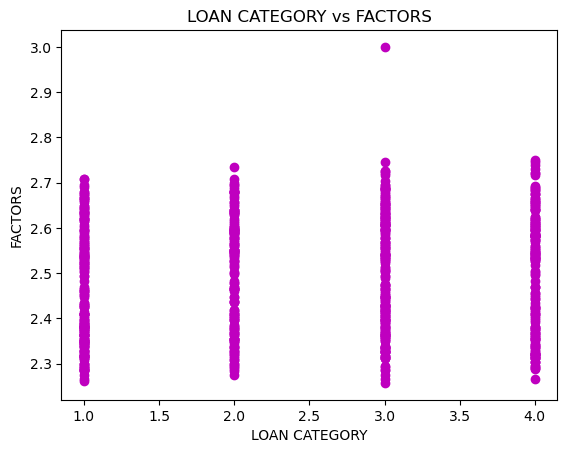

In [210]:
# training data vs predicted values
import matplotlib.pyplot as plt
plt.scatter(y_train,predict_y_train, color ='m')
plt.title('LOAN CATEGORY vs FACTORS')
plt.xlabel('LOAN CATEGORY')
plt.ylabel('FACTORS')

Text(0, 0.5, 'FACTORS')

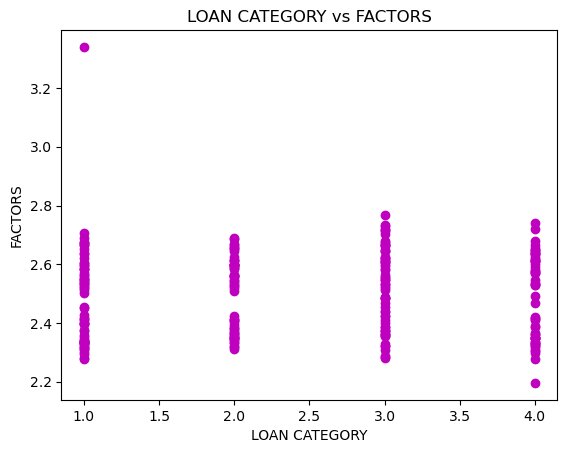

In [216]:
# training data vs predicted values
import matplotlib.pyplot as plt
plt.scatter(y_test,predict_y_test, color ='m')
plt.title('LOAN CATEGORY vs FACTORS')
plt.xlabel('LOAN CATEGORY')
plt.ylabel('FACTORS')